# Radial velocity of a star using its S2D spectre

This time, the S2D spectre of the previous star is used. It would be interesting to see if there is any differencies on the radial velocity. ARES was given the rvmask (-16.6 km/s) and the rejt (0.998719) calculated for the S1D file.

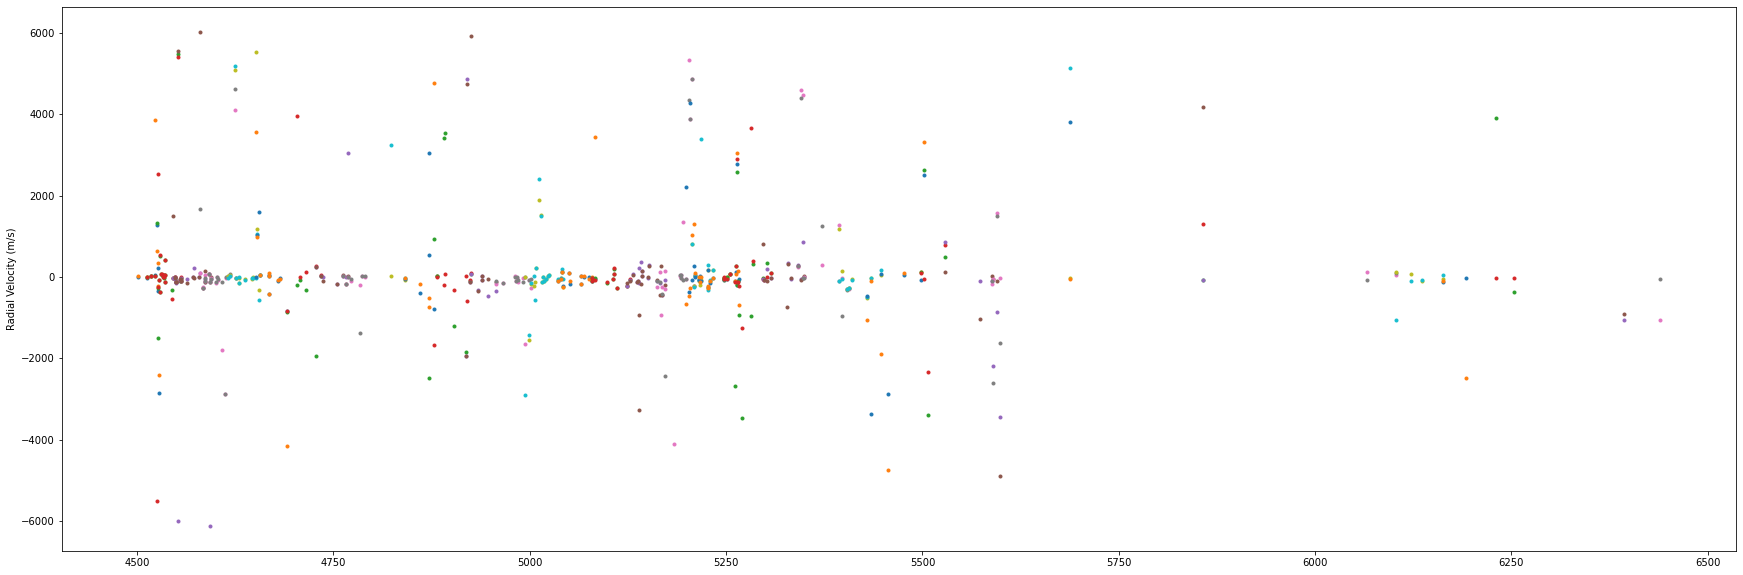

In [26]:
import numpy as np
from numpy import loadtxt
import scipy.constants as cnt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (30, 10)

lines = loadtxt('lines_data.txt' , float) # loads the file with the line data
ori_lambda = lines[2:] # array with the reference values of the wavelength

numbers = np.arange(51,113) # array with the numbers used to access the files
n2 = np.arange(115,119)
numbers = np.append(numbers,n2)
n3 = np.arange(123,131)
numbers = np.append(numbers,n3)
n4 = np.arange(133,137)
numbers = np.append(numbers,n4)

N = len(numbers) 

data = np.zeros([N,27]) # empty matrix to store the fitted values of the wavelenghts
# the previous matrix has 27 columns because it is the maximum value of wavelenghts found
RV_matrix = np.zeros([N,27]) # empty matrix to store the RV values for each wavelenght
RV = np.zeros(0) # empty array to store the RV values

for i,n in enumerate(numbers):
    
    info=loadtxt('{}.ares'.format(n),float) # loads the file with the data
    
    if np.ndim(info)!=1:
        fit=info[:,-1]
        ref=info[:,0]
        M=len(fit)
        
    else:
        fit=info[-1]
        ref=info[0]
        M=1
        
    data[i,:M]=fit #stores the data for each document in the data matrix 
    
    # this lines identify the lines that should be used from the original line data
    distances = np.abs(ori_lambda[:, np.newaxis] - ref)
    closest_indices = np.argmin(distances, axis=0)
    ref= ori_lambda[closest_indices]
    
    RV_matrix[i,:M] = (fit - ref) / ref * cnt.c # calculates the values of RV and stores them in the RV_matrix
    RV=np.append(RV,RV_matrix[i,:M]) # stores the values in the RV array
    
    plt.plot(ref,RV_matrix[i,:M],'.') # plots the graphic
    
plt.ylabel('Radial Velocity (m/s)')
plt.show()

By plotting each graph individually, I verified that the most disparate values are found approximately in the region of the extreme wavelengths for each set of data, but this is not always verified. They will perhaps be removed when a later statistic is carried out. For the same wavelengths I have 2 sets of data and I decided not to combine the calculated values of the radial velocities for each one and keep the measurements independent, as there are outliers in one set that are not outliers in the other, so I can then opt for just one of the values.

The bellow graphic shows the obtained values for the radial velocities. It is easy to notice the presence of some outliers. The mean ($\mu$ - red line), standard deviation ($\sigma$) and median (green line) of the values is also presented. Actually, the standard deviation is much bigger than the mean value, so the outliers were successivly removed until the standard deviation was smaller than the mean. All the values outside of $[\mu - \sigma , \mu + \sigma]$ were removed and new values for $\mu$, $\sigma$ and median were calculated.

mean = 113.14050 m/s ; standard deviation = 1363.65361 m/s ; median = -31.72035 m/s


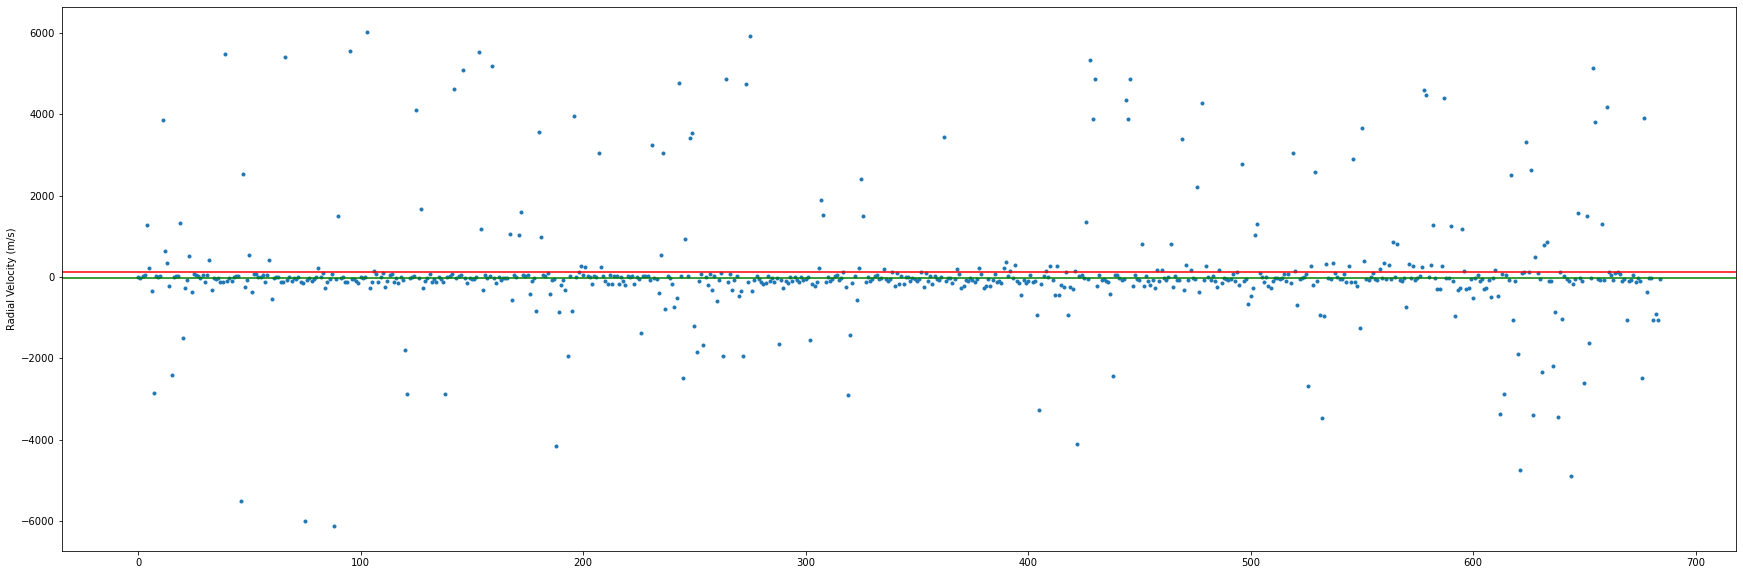

In [39]:
std = np.std(RV) #standard deviation of the values of the RVs
mean = np.mean(RV) # mean of the values of the RVs
median = np.median(RV) # median of the values of the RVs

print('mean = {:.5f} m/s ; standard deviation = {:.5f} m/s ; median = {:.5f} m/s'.format(mean,std,median))
plt.plot(RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(mean,color='red')
plt.axhline(median,color='green')
plt.show()

mean = -33.74368 m/s ; standard deviation = 308.17418 m/s ; median = -35.73390 m/s


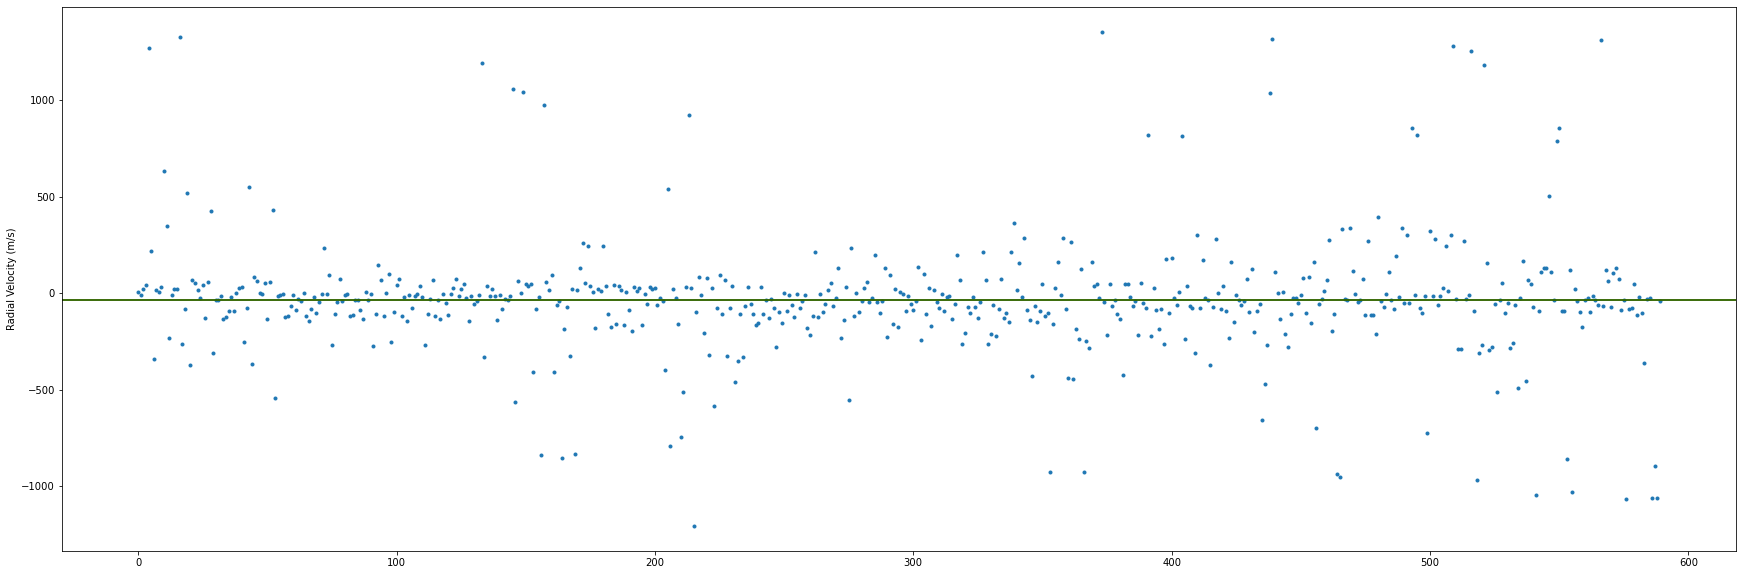

In [40]:
corrRV = np.zeros(0)

for i , rv in enumerate(RV): # this cycle chooses the values between the mean and standard deviation
    if mean - std < rv < mean + std:
        corrRV = np.append(corrRV,rv)
        
corr_mean = np.mean(corrRV)
corr_std = np.std(corrRV)
corr_median = np.median(corrRV)

print('mean = {:.5f} m/s ; standard deviation = {:.5f} m/s ; median = {:.5f} m/s'.format(corr_mean,corr_std,corr_median))
plt.plot(corrRV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr_mean,color='red')
plt.axhline(corr_median,color='green')
plt.show()

mean = -41.01450 m/s ; standard deviation = 111.88580 m/s ; median = -35.66160 m/s


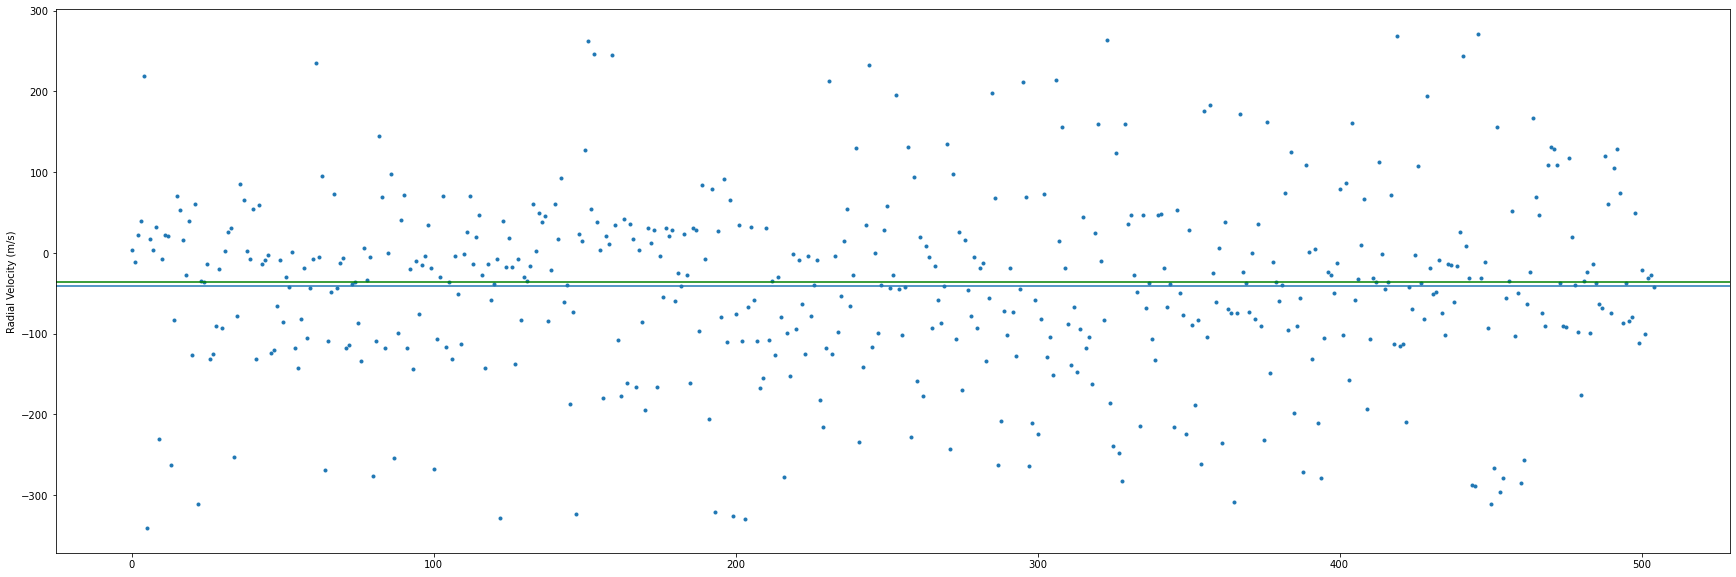

In [41]:
corr2RV = np.zeros(0)

for i , rv in enumerate(corrRV):
    if corr_mean - corr_std < rv < corr_mean + corr_std:
        corr2RV = np.append(corr2RV,rv)
        
corr2_mean = np.mean(corr2RV)
corr2_std = np.std(corr2RV)
corr2_median = np.median(corr2RV)

print('mean = {:.5f} m/s ; standard deviation = {:.5f} m/s ; median = {:.5f} m/s'.format(corr2_mean,corr2_std,corr2_median))
plt.plot(corr2RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr2_mean)
plt.axhline(corr2_median,color='green')
plt.show()

mean = -36.32440 m/s ; standard deviation = 55.94112 m/s ; median = -34.43237 m/s


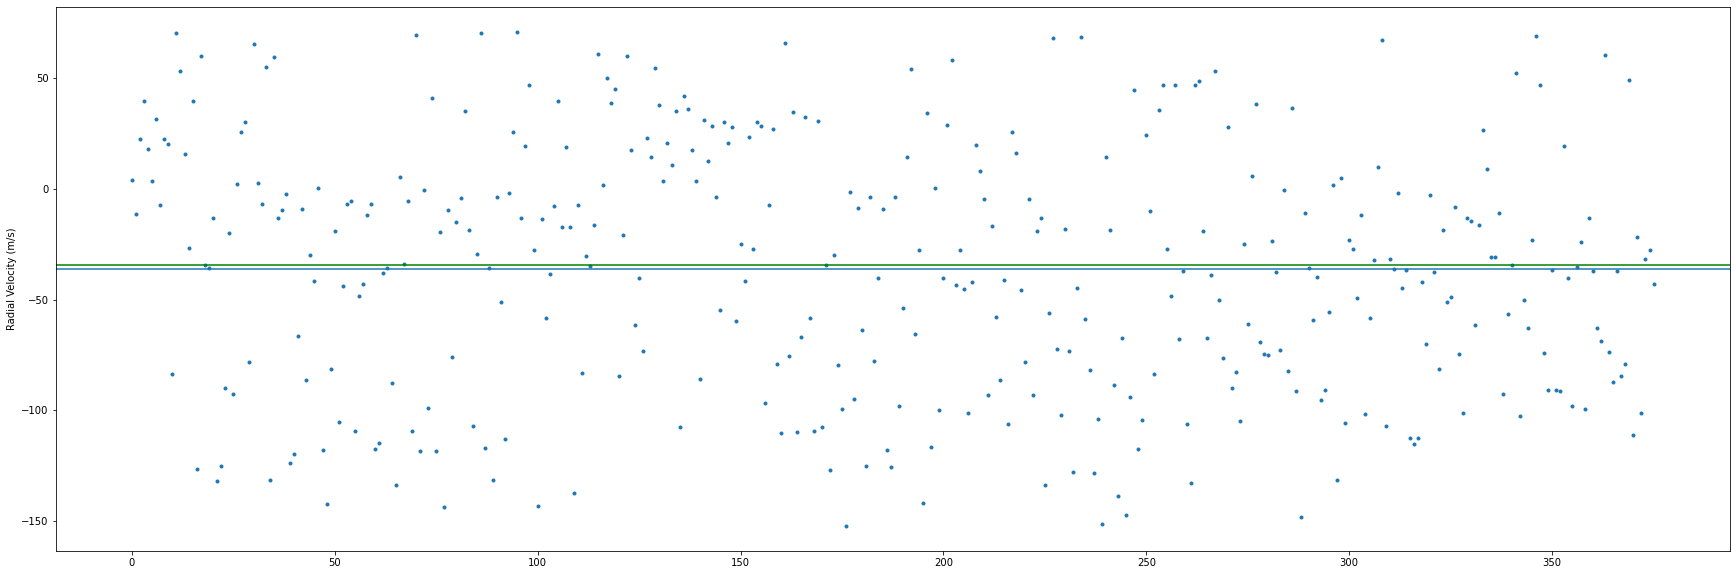

In [42]:
corr3RV = np.zeros(0)

for i , rv in enumerate(corr2RV):
    if corr2_mean - corr2_std < rv < corr2_mean + corr2_std:
        corr3RV = np.append(corr3RV,rv)
        
corr3_mean = np.mean(corr3RV)
corr3_std = np.std(corr3RV)
corr3_median = np.median(corr3RV)

print('mean = {:.5f} m/s ; standard deviation = {:.5f} m/s ; median = {:.5f} m/s'.format(corr3_mean,corr3_std,corr3_median))
plt.plot(corr3RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr3_mean)
plt.axhline(corr3_median,color='green')
plt.show()

mean = -35.03138 m/s ; standard deviation = 30.50349 m/s ; median = -34.34863 m/s


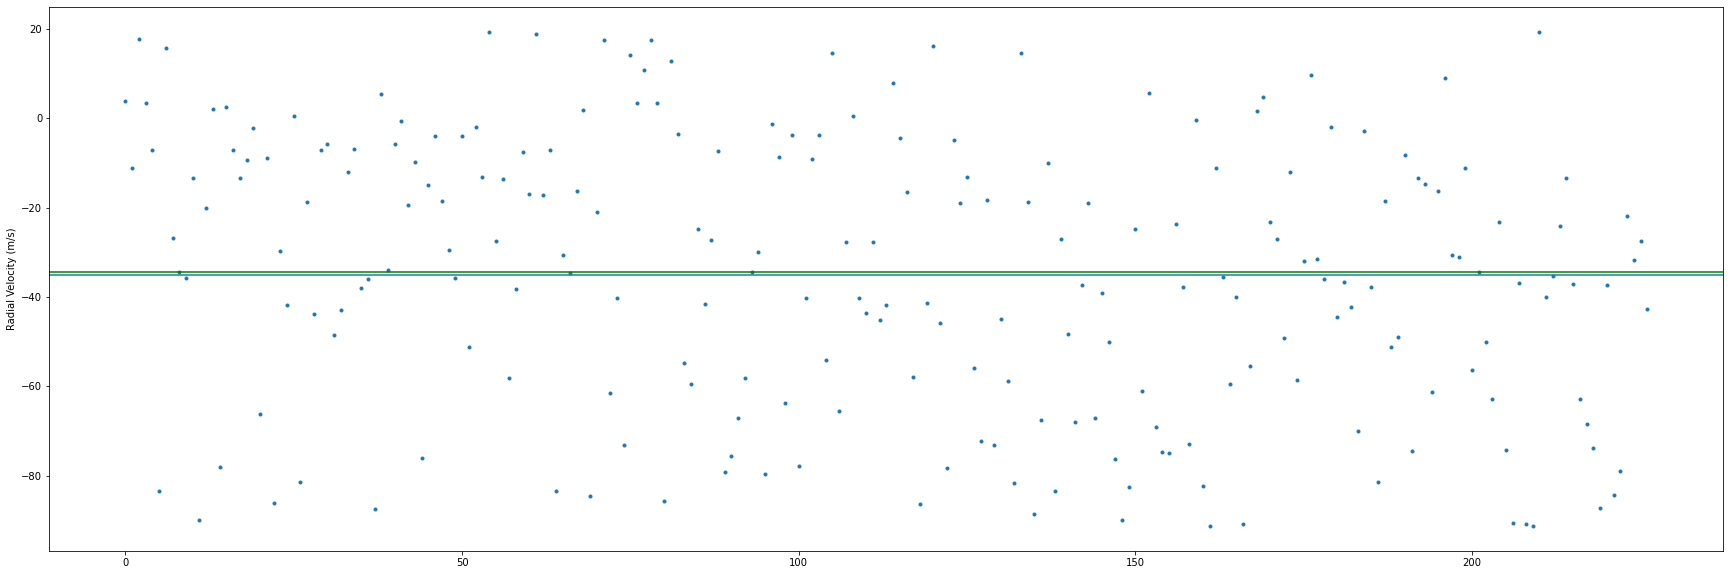

In [43]:
corr4RV = np.zeros(0)

for i , rv in enumerate(corr3RV):
    if corr3_mean - corr3_std < rv < corr3_mean + corr3_std:
        corr4RV = np.append(corr4RV,rv)
        
corr4_mean = np.mean(corr4RV)
corr4_std = np.std(corr4RV)
corr4_median = np.median(corr4RV)

print('mean = {:.5f} m/s ; standard deviation = {:.5f} m/s ; median = {:.5f} m/s'.format(corr4_mean,corr4_std,corr4_median))
plt.plot(corr4RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr4_mean)
plt.axhline(corr4_median,color='green')
plt.show()

mean = -31.15328 m/s ; standard deviation = 16.61735 m/s ; median = -31.26221 m/s


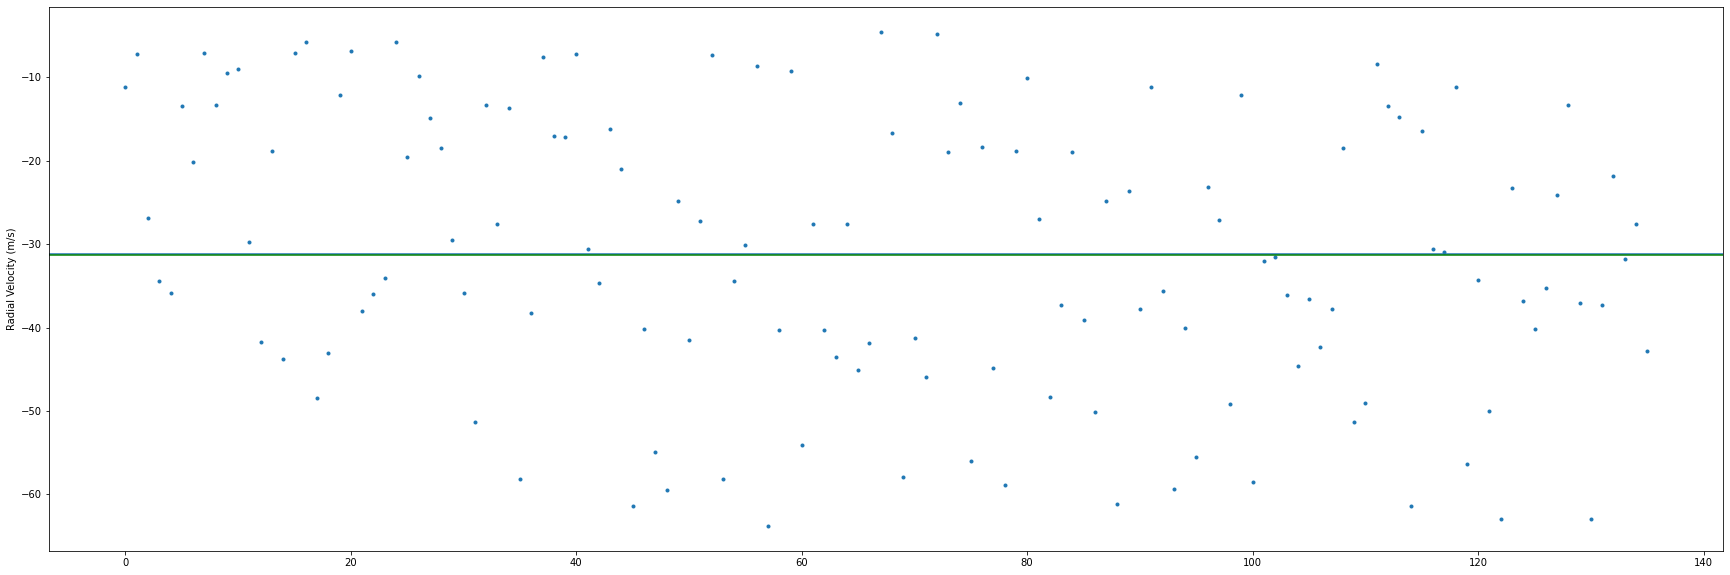

In [47]:
corr5RV = np.zeros(0)

for i , rv in enumerate(corr3RV):
    if corr4_mean - corr4_std < rv < corr4_mean + corr4_std:
        corr5RV = np.append(corr5RV,rv)
        
corr5_mean = np.mean(corr5RV)
corr5_std = np.std(corr5RV)
corr5_median = np.median(corr5RV)

print('mean = {:.5f} m/s ; standard deviation = {:.5f} m/s ; median = {:.5f} m/s'.format(corr5_mean,corr5_std,corr5_median))
plt.plot(corr5RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr5_mean)
plt.axhline(corr5_median,color='green')
plt.show()

Once again, the mean varies much more than the median. We now used around the triple of the data (685), therefor the statistics seem more appropriate. For SD1 we obtained $\mu=-46.50781 m/s$, $\sigma=24.46419 m/s$ and median $-42.87077 m/s$. Now we obtained $\mu=-31.15328 m/s$, $\sigma=16.61735 m/s$ and median $-31.26221 m/s$. The relative difference (using the values for S2D as the most accurate) between the means and medians is around 30%.